In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, geo_tools
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:

df1=et.loadDFO()
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,12.0,NaN,None,5.28,mg/m^3,6.6,13.6,umol/L,NaN,NaN,12.0,1982-07-16 01:21:00
1,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,21.5,NaN,None,0.61,mg/m^3,21.2,45.0,umol/L,NaN,NaN,21.5,1982-07-16 01:21:00
2,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,30.5,NaN,None,NaN,mg/m^3,23.5,47.4,umol/L,NaN,NaN,30.5,1982-07-16 01:21:00
3,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,52.3,NaN,None,NaN,mg/m^3,28.0,50.2,umol/L,NaN,NaN,52.3,1982-07-16 01:21:00
4,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,75.4,NaN,None,NaN,mg/m^3,26.5,49.1,umol/L,NaN,NaN,75.4,1982-07-16 01:21:00


(array([ 4421.,     0., 10641.,   871.,  1004.,  2699.,   232.,  3028.,
        11517., 13849.]),
 array([704863.75416667, 708060.60233565, 711257.45050463, 714454.29867361,
        717651.14684259, 720847.99501157, 724044.84318056, 727241.69134954,
        730438.53951852, 733635.3876875 , 736832.23585648]),
 <a list of 10 Patch objects>)

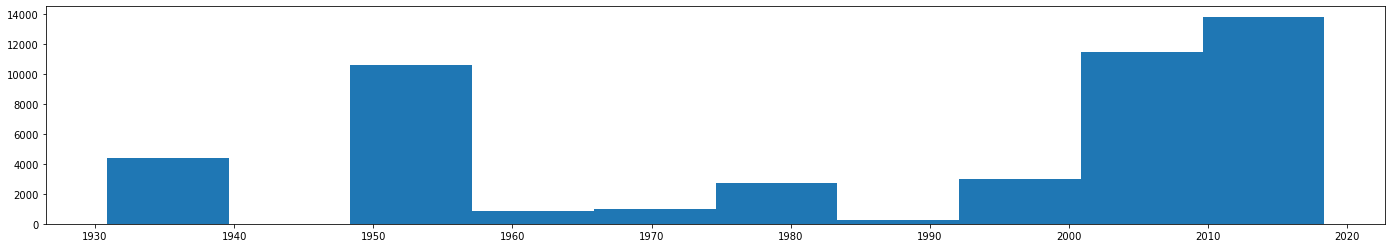

In [3]:
fig,ax=plt.subplots(1,1,figsize=(24,4))
ax.hist(df1['dtUTC'].values)

In [4]:
df1.loc[df1.Si>=0.0]['dtUTC'].max()

Timestamp('2018-05-18 05:39:38')

In [5]:
dfam=df1.loc[(df1.Ammonium>=0)]
dfam

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
6731,1995.0,7.0,5.0,23.216667,48.693000,-123.505,0.2,NaN,0.20,umol/L,NaN,None,0.2,5.6,umol/L,27.996839,17.559562,0.198309,1995-07-05 23:13:00
6732,1995.0,7.0,5.0,23.216667,48.693000,-123.505,5.2,NaN,0.26,umol/L,NaN,None,5.6,18.3,umol/L,28.561329,14.012140,5.155979,1995-07-05 23:13:00
6733,1995.0,7.0,5.0,23.216667,48.693000,-123.505,10.2,NaN,0.24,umol/L,NaN,None,8.6,21.8,umol/L,28.733937,13.288506,10.113529,1995-07-05 23:13:00
6734,1995.0,7.0,5.0,23.216667,48.693000,-123.505,15.1,NaN,0.20,umol/L,NaN,None,11.2,25.4,umol/L,28.903706,13.070437,14.971810,1995-07-05 23:13:00
6735,1995.0,7.0,5.0,23.216667,48.693000,-123.505,20.2,NaN,0.18,umol/L,NaN,None,13.0,27.8,umol/L,29.068438,12.762858,20.028267,1995-07-05 23:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38129,2003.0,2.0,28.0,15.860556,49.007167,-123.385,125.4,NaN,0.00,umol/L,NaN,mg/m^3,27.3,51.5,umol/L,30.585648,8.557020,124.298603,2003-02-28 15:51:38
38130,2003.0,2.0,28.0,15.860556,49.007167,-123.385,161.5,NaN,0.01,umol/L,NaN,mg/m^3,29.3,56.0,umol/L,30.861703,8.875833,160.067538,2003-02-28 15:51:38
38131,2003.0,2.0,28.0,15.860556,49.007167,-123.385,174.9,NaN,0.00,umol/L,NaN,mg/m^3,29.8,57.5,umol/L,30.939630,8.951475,173.343060,2003-02-28 15:51:38
38132,2003.0,2.0,28.0,15.860556,49.007167,-123.385,199.6,NaN,0.00,umol/L,NaN,mg/m^3,30.6,60.6,umol/L,31.084543,9.059098,197.811359,2003-02-28 15:51:38


In [6]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]

(48, 49.5)

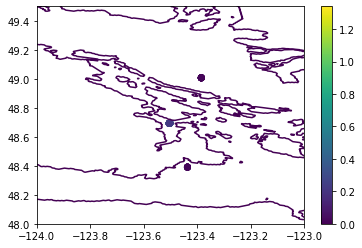

In [7]:
m=plt.scatter(dfam.Lon,dfam.Lat,c=dfam.Ammonium)
plt.contour(navlon,navlat,tmask[0,:,:],levels=[.5,])
plt.colorbar(m)
plt.xlim((-124,-123))
plt.ylim(48,49.5)

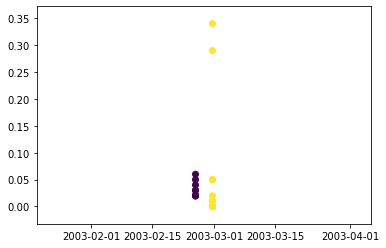

In [8]:
dfam2=dfam.loc[(dfam.Lat<49.2)]
dfam3=dfam.loc[(dfam.Lat<49.2)&(dfam.dtUTC>dt.datetime(2003,1,1))]
plt.scatter(dfam3.dtUTC,dfam3.Ammonium,c=dfam3.Lat)

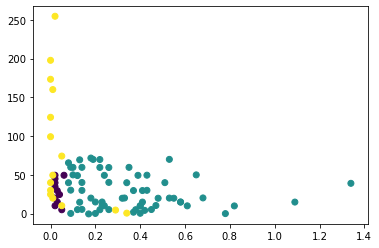

In [9]:
plt.scatter(dfam2.Ammonium,dfam2.Z,c=dfam2.Lat)

In [10]:
np.unique(dfam2.loc[dfam2.Lat<49,['Lat','Lon']])

array([-123.505     , -123.50466667, -123.50416667, -123.50383333,
       -123.50283333, -123.50183333, -123.43666667,   48.391     ,
         48.6925    ,   48.69266667,   48.693     ,   48.69333333,
         48.69366667,   48.69433333])

In [11]:
j,i=geo_tools.find_closest_model_point(-123.43666667,   48.391,navlon,navlat)

In [12]:
j,i

(299, 184)

In [13]:
sourceloc='/results/SalishSea/hindcast.201905/'
start=dt.datetime(2014,1,1)
end=dt.datetime(2016,1,1)
flist=et.index_model_files(start,end,sourceloc,'nowcast',1,'ptrc_T',1)

In [14]:
data=list()
for ind, row in flist.iterrows():
    with nc.Dataset(row['paths']) as f:
        data.append(np.mean(f.variables['ammonium'][:,:,j,i],0,keepdims=True))

In [15]:
data=np.concatenate(data,axis=0)

In [16]:
times=[start+dt.timedelta(days=ii) for ii in \
       range(0,int((end-start).total_seconds()/(24*3600)+1))]

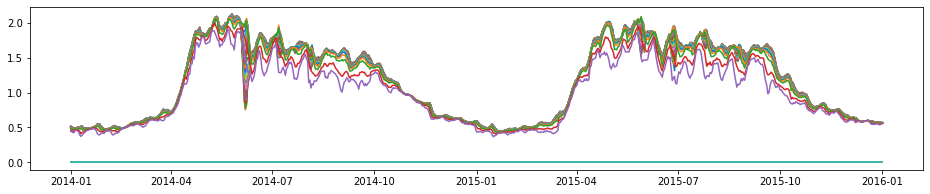

In [19]:
fig,ax=plt.subplots(1,1,figsize=(16,3))
ax.plot(times,data);